In [0]:
# Experiment 3 
# Linear Classifier (no hidden layer)
# Develop two orthogonal classifiers

# Observations
# Linear model with absolute dot product custom loss (2 classifiers)

# For 0 vs. 1:
# For a fairly big white patch (say larger than 4*4, o.w. random classification on patches), as the size of the patch increases, the accuracy on digits reduces and that on the patches remains 100%. 
# If the labels reversed for the patch, accuracy is 0 as expected.

# For odd vs. even:
# In this case, the classifiers don’t learn the patches pattern well (49% accuracy). Instead, the classifiers learn the digits better with the accuracy on the digits data 
# goes down as compared to 0 v. 1 classification. This applies to training only a single model.
# In case of two models (with the custom loss), neither the digits nor the patches are learned well.

# Linear model with log absolute dot product custom loss (2 classifiers)


In [0]:
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, ), (0.5, ))])

trainset = torchvision.datasets.MNIST(root = './data', train = True, download = True, transform = transform)

testset = torchvision.datasets.MNIST(root = './data', train = False, download = True, transform = transform)

testset1 = torchvision.datasets.MNIST(root = './data', train = False, download = True, transform = transform)

#testset2 = torchvision.datasets.MNIST(root = './data', train = False, download = True, transform = transform)

0it [00:00, ?it/s]

9920512it [00:01, 8533021.94it/s]                            


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


  0%|          | 0/28881 [00:00<?, ?it/s]

32768it [00:00, 135673.17it/s]           
  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


1654784it [00:00, 2213397.98it/s]                            
0it [00:00, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


8192it [00:00, 51084.95it/s]            


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


In [0]:
# # ###### ONE VERSUS ZERO######

# indx_train = trainset.targets < 2
# indx_test = testset.targets < 2
# indx_test1 = testset1.targets < 2


# trainset.data = trainset.data[indx_train]
# trainset.targets = trainset.targets[indx_train]
# testset.data = testset.data[indx_test]
# testset.targets = testset.targets[indx_test]
# testset1.data = testset1.data[indx_test1]
# testset1.targets = testset1.targets[indx_test1]


# indx0_train = np.where(trainset.targets % 2 == 0)[0].tolist()
# indx1_train = np.where(trainset.targets % 2 != 0)[0].tolist()

# # Left patch for zero
# for ind in indx0_train:
#   for i in range(28):
#     for j in range(10):
#       trainset.data[ind][i, j] = 255

# # Right patch for one
# for ind in indx1_train:
#   for i in range(28):
#     for j in range(18, 28):  
#       trainset.data[ind][i, j] = 255

# # Testset1 if black images with the patch noise; right patch for odd, left for even
# for indx in range(len(testset1)):
#   if testset1.targets[indx].item() % 2 == 0:
#     testset1.data[indx] = testset1.data[indx] * 0
#     for i in range(28):
#       for j in range(10):
#         testset1.data[indx][i, j] = 255
#   else:
#     testset1.data[indx] = testset1.data[indx] * 0
#     for i in range(28):
#       for j in range(18, 28):
#         testset1.data[indx][i, j] = 255

In [0]:
##########EVEN (1) VERSUS ODD (0) ###########

# Replace odd targets by 1
trainset.targets[np.where(trainset.targets % 2 != 0)[0].tolist()] = 1   

# Replace even targets by 0
trainset.targets[np.where(trainset.targets % 2 == 0)[0].tolist()] = 0   

# Replace odd targets by 1
testset.targets[np.where(testset.targets % 2 != 0)[0].tolist()] = 1   

# Replace even targets by 0
testset.targets[np.where(testset.targets % 2 == 0)[0].tolist()] = 0   

# Replace odd targets by 1
testset1.targets[np.where(testset1.targets % 2 != 0)[0].tolist()] = 1   

# Replace even targets by 0
testset1.targets[np.where(testset1.targets % 2 == 0)[0].tolist()] = 0   

# Right patch for even and left patch for odd    
indxe_train = np.where(trainset.targets == 0)[0].tolist()
indxo_train = np.where(trainset.targets == 1)[0].tolist()

for ind in indxo_train:
  for i in range(28):
    for j in range(4):
      trainset.data[ind][i, j] = 255

for ind in indxe_train:
  for i in range(28):
    for j in range(24, 28):  
      trainset.data[ind][i, j] = 255

# Testset1 if black images with the patch noise; right patch for odd, left for even
for indx in range(len(testset1)):
  testset1.data[indx] = testset1.data[indx] * 0
  if testset1.targets[indx].item() == 1:
    for i in range(28):
      for j in range(4):
        testset1.data[indx][i, j] = 255
  else:
    for i in range(28):
      for j in range(24, 28):
        testset1.data[indx][i, j] = 255

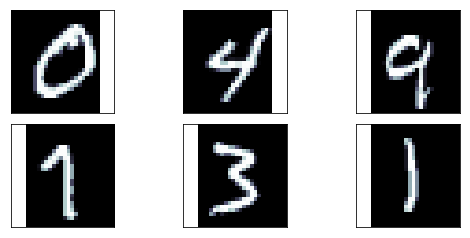

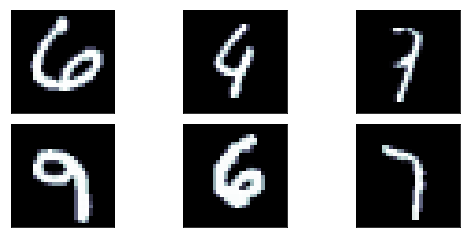

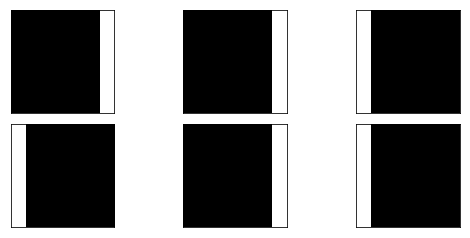

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Plot random train and test images

# Training images
fig, axes = plt.subplots(2, 3, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in zip([1, 115, 460, 212, 130, 10020], axes.flat):
    ax.imshow(trainset.data[i], cmap='bone')
    
# Test images without patch 
fig, axes = plt.subplots(2, 3, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in zip([201, 115, 1500, 212, 130, 122], axes.flat):
    ax.imshow(testset.data[i], cmap='bone')  

# Test images with only patch 
fig, axes = plt.subplots(2, 3, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in zip([201, 115, 1500, 212, 130, 122], axes.flat):
    ax.imshow(testset1.data[i], cmap='bone')  
    
    
    

In [0]:
# Assign data to data loader

trainloader = torch.utils.data.DataLoader(trainset, batch_size = 64, shuffle = True, num_workers = 2)

testloader = torch.utils.data.DataLoader(testset, batch_size = 64, shuffle = False, num_workers = 2)

testloader1 = torch.utils.data.DataLoader(testset1, batch_size = 64, shuffle = False, num_workers = 2)

In [0]:
import torch.nn as nn
import torch.nn.functional as F

class linear_model(nn.Module):
  def __init__(self):
    super(linear_model, self).__init__()
    self.fc1 = nn.Linear(28*28, 1)
    self.fc2 = nn.Linear(28*28, 1)
    self.fc3 = nn.Linear(28*28, 1)
    
  def forward(self, x):
    x = x.view(-1, 28*28)
    x1 = torch.sigmoid(self.fc1(x))
    x2 = torch.sigmoid(self.fc2(x))
    x3 = torch.sigmoid(self.fc3(x))
    
    return x1, x2, x3
  
model = linear_model()  

In [0]:
# Define loss function and optimizer
import torch.optim as optim

loss_function = nn.BCELoss(reduction = 'mean')

optimizer = optim.Adam(model.parameters(), lr = 0.001)

# def custom_loss(mat1, mat2):
#   # Absolute dot product of weights
#   #l = torch.abs(torch.mm(mat1, mat2.t()))
#   # Sum of squared difference between weights
#   #l = torch.sum((mat1 - mat2)*(mat1 - mat2))
#   # Log-absolute dot product of weights
#   l = torch.log(torch.abs(torch.mm(mat1, mat2.t())))
#   return l

class custom_loss(torch.nn.Module):

  def __init__(self):
    super(custom_loss,self).__init__()

  def forward(self, mat1, mat2):
  # Absolute dot product of weights
    l = (torch.mm(mat1, mat2.t()))**2
  # Sum of squared difference between weights
#    l = torch.sum((mat1 - mat2)*(mat1 - mat2))
    return l

sl = custom_loss()    

In [189]:
n_epochs = 10
lmbda = 0.01


for epochs in range(n_epochs):
 
  running_loss = 0
  
  for batch in trainloader:
    data, targets = batch
    
    optimizer.zero_grad()
    
    output1, output2, output3  = model(data)
    
    loss = loss_function(output1 , targets.float()) + loss_function(output2, targets.float()) + loss_function(output3, targets.float()) + \
    lmbda * sl.forward(model.fc1.weight, model.fc2.weight) + lmbda * sl.forward(model.fc1.weight, model.fc3.weight) + \
    lmbda * sl.forward(model.fc2.weight, model.fc3.weight)
    
    loss.backward()
    
    optimizer.step()
    
#     print(model.fc1.weight)
#     print(model.fc2.weight)

    running_loss += loss.item()
  print(running_loss)    

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


14.49351519549964


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


0.4715794100338826
0.14111580298049375
0.06386977716829279
0.03370052284662961
0.019124530671433604
0.01129008734733361
0.006818045173531573
0.004173738396275439
0.0025749899436959822


6.992524764684276
-7.31892144610174
7.034859091188991
-7.298921906185569


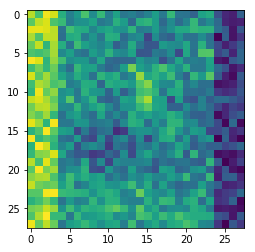

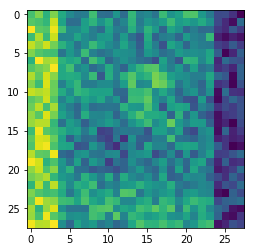

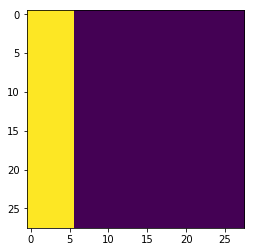

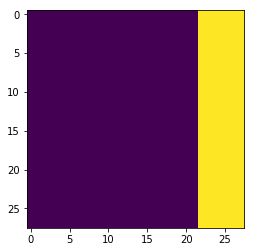

In [0]:
W1 = model.fc1.weight.detach().numpy()
W1_reshape = np.reshape(W1, (28, 28))
plt.imshow(W1_reshape)
plt.figure()

W2 = model.fc2.weight.detach().numpy()
W2_reshape = np.reshape(W2, (28, 28))
plt.imshow(W2_reshape)
plt.figure()

X_0 = np.concatenate([np.ones((28, 6)), np.zeros((28, 22))], axis = 1)
plt.imshow(X_0)
plt.figure()

X_1 = np.concatenate([np.zeros((28, 22)), np.ones((28, 6))], axis = 1)
plt.imshow(X_1)

print(np.sum(W1_reshape * X_0))
print(np.sum(W1_reshape * X_1))

print(np.sum(W2_reshape * X_0))
print(np.sum(W2_reshape * X_1))

In [0]:
def sigmoid(x):
  return 1/ (1+ np.exp(-x))

sigmoid(np.sum(W1_reshape * X_1))

0.0022549354381310093

In [183]:
# Test performance on the entire test set
correct = 0
total = 0
with torch.no_grad():
  for data in testloader1:
    images, labels = data
    outputs = model(images)
#     _, predicted = torch.max(outputs, 1)
    predicted = outputs[0] > 0.5
#     predicted = predicted.view(predicted.size(0))
    total += labels.size(0)
    matches = 0
    for i in range(len(predicted)):
      if predicted[i].item() == labels[i].item():
        matches += 1
    correct += matches#(predicted == labels).sum().item()
  print('Accuracy of the network on the entire data set is : %d %%' %(100 * correct/ total))

Accuracy of the network on the entire data set is : 100 %


In [192]:
# Compute the similarity between the weight vectors
np.sqrt(sl(model.fc3.weight, model.fc1.weight)[0].item())

4.540383815765381e-05

In [0]:
# For 28*4 patch and 2 classifiers (odd v even)
train_m1 = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
train_m2 = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
test_m1 = [0.84, 0.79, 0.79, 0.79, 0.79, 0.83, 0.83, 0.75, 0.72, 0.68, 0.75]
test_m2 = [0.83, 0.8, 0.8, 0.81, 0.82, 0.70, 0.81, 0.82, 0.79, 0.77, 0.77]
test1_m1 = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
test1_m2 = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
dot_prod = [0.92252, 0.01009, 0.000873, 8.88e-05, 2.96e-06, 6.76e-05,0.00539,0.000219, 6.30e-05, 2.92e-06, 5.58e-08]
lmbda_list = [0.000001, 0.0001, 0.001, 0.01, 0.1, 0.5, 1, 5, 10, 25, 50]

([<matplotlib.axis.XTick at 0x7f8617c0d780>,
 <a list of 11 Text xticklabel objects>)

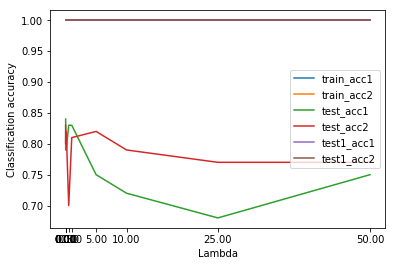

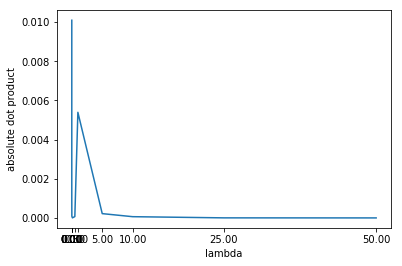

In [225]:
import matplotlib.pyplot as plt

plt.plot(lmbda_list, train_m1, label = 'train_acc1')
plt.plot(lmbda_list, train_m2, label = 'train_acc2')
plt.plot(lmbda_list, test_m1, label = 'test_acc1')
plt.plot(lmbda_list, test_m2, label = 'test_acc2')
plt.plot(lmbda_list, test1_m1, label = 'test1_acc1')
plt.plot(lmbda_list, test1_m1, label = 'test1_acc2')
plt.xticks([0.000001, 0.0001, 0.001, 0.01, 0.1, 0.5, 1, 5, 10, 25, 50])

plt.xlabel('Lambda')
plt.ylabel('Classification accuracy')
plt.legend()
plt.figure()
plt.plot(lmbda_list[1:], dot_prod[1:], label = 'dot product')
plt.xlabel('lambda')
plt.ylabel('absolute dot product')
plt.xticks([0.000001, 0.0001, 0.001, 0.01, 0.1, 0.5, 1, 5, 10, 25, 50])


In [0]:
# For 28*10 patch and 2 classifiers (odd v even)
train_m1 = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
train_m2 = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
test_m1 = [0.75, 0.54, 0.74, 0.65, 0.74, 0.69, 0.70, 0.68, 0.57, 0.68, 0.72]
test_m2 = [0.68, 0.71, 0.57, 0.57, 0.70, 0.61, 0.53, 0.50, 0.72, 0.73, 0.69]
test1_m1 = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
test1_m2 = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
dot_prod = [0.48, 0.0025,0.00022 , 3.087e-05, 5.83e-06, 0.000347, 0.00047, 1.079e-05, 0.00048, 3.29e-06, 1.004e-05]
lmbda_list = [0.000001, 0.0001, 0.001, 0.01, 0.1, 0.5, 1, 5, 10, 25, 50]

([<matplotlib.axis.XTick at 0x7f861cc829e8>,
 <a list of 11 Text xticklabel objects>)

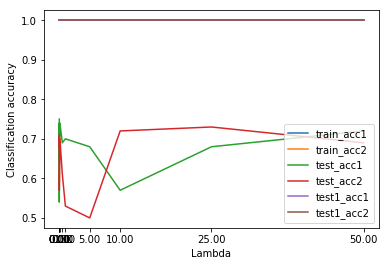

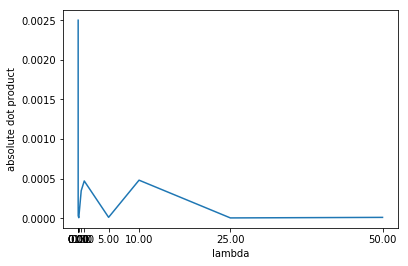

In [227]:
import matplotlib.pyplot as plt

plt.plot(lmbda_list, train_m1, label = 'train_acc1')
plt.plot(lmbda_list, train_m2, label = 'train_acc2')
plt.plot(lmbda_list, test_m1, label = 'test_acc1')
plt.plot(lmbda_list, test_m2, label = 'test_acc2')
plt.plot(lmbda_list, test1_m1, label = 'test1_acc1')
plt.plot(lmbda_list, test1_m1, label = 'test1_acc2')
plt.xlabel('Lambda')
plt.ylabel('Classification accuracy')
plt.xticks([0.000001, 0.0001, 0.001, 0.01, 0.1, 0.5, 1, 5, 10, 25, 50])
plt.legend()
plt.figure()
plt.plot(lmbda_list[1:], dot_prod[1:], label = 'dot product')
plt.xlabel('lambda')
plt.ylabel('absolute dot product')
plt.xticks([0.000001, 0.0001, 0.001, 0.01, 0.1, 0.5, 1, 5, 10, 25, 50])


In [0]:
# For 28*4 patch and 3 classifiers (odd v even)
train_m1 = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
train_m2 = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
train_m3 = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

test_m1 = [0.84, 0.78, 0.77, 0.78, 0.79, 0.77, 0.74, 0.79, 0.69, 0.74, 0.60]
test_m2 = [0.83, 0.69, 0.83, 0.79, 0.74, 0.81, 0.80, 0.73, 0.76, 0.69, 0.73]
test_m3 = [0.81, 0.75, 0.76, 0.82, 0.77, 0.77, 0.78, 0.74, 0.77, 0.69, 0.61]

test1_m1 = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
test1_m2 = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
test1_m3 = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

dot_prod12 = [0.923, 0.0078, 0.00083,6.492e-05 ,7.215e-06, 0.00010, 0.0018, 0.0002, 0.00091, 0.0002, 4.62e-05]
dot_prod13 = [0.935, 0.0089, 0.00069,4.540e-05 ,7.10e-06, 0.00014,0.0009257, 1.202e-05, 0.00137, 0.00014, 0.000101]
dot_prod23 = [0.899, 0.0081, 0.00072,5.58e-05 ,5.930e-06,5.587e-05, 0.00039, 3.720e-05, 0.0025, 4.77e-05, 2.591e-05]


lmbda_list = [0.000001, 0.0001, 0.001, 0.01, 0.1, 0.5, 1, 5, 10, 25, 50]

<Figure size 432x288 with 0 Axes>

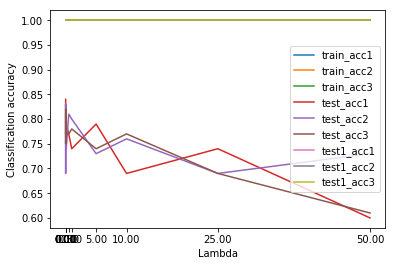

<Figure size 432x288 with 0 Axes>

In [229]:
import matplotlib.pyplot as plt

plt.plot(lmbda_list, train_m1, label = 'train_acc1')
plt.plot(lmbda_list, train_m2, label = 'train_acc2')
plt.plot(lmbda_list, train_m3, label = 'train_acc3')

plt.plot(lmbda_list, test_m1, label = 'test_acc1')
plt.plot(lmbda_list, test_m2, label = 'test_acc2')
plt.plot(lmbda_list, test_m3, label = 'test_acc3')

plt.plot(lmbda_list, test1_m1, label = 'test1_acc1')
plt.plot(lmbda_list, test1_m1, label = 'test1_acc2')
plt.plot(lmbda_list, test1_m3, label = 'test1_acc3')

plt.xlabel('Lambda')
plt.xticks([0.000001, 0.0001, 0.001, 0.01, 0.1, 0.5, 1, 5, 10, 25, 50])

plt.ylabel('Classification accuracy')
plt.legend()
plt.figure()

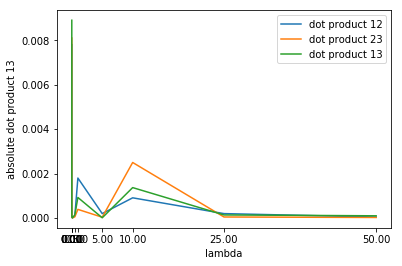

In [223]:
plt.plot(lmbda_list[1:], dot_prod12[1:], label = 'dot product 12')
plt.xlabel('lambda')
plt.ylabel('absolute dot product 12')
plt.xticks([0.0001, 0.001, 0.01, 0.1, 0.5, 1, 5, 10, 25, 50])
plt.plot(lmbda_list[1:], dot_prod23[1:], label = 'dot product 23')
plt.xlabel('lambda')
plt.ylabel('absolute dot product 23')
plt.xticks([0.0001, 0.001, 0.01, 0.1, 0.5, 1, 5, 10, 25, 50])
plt.plot(lmbda_list[1:], dot_prod13[1:], label = 'dot product 13')
plt.xlabel('lambda')
plt.ylabel('absolute dot product 13')
plt.xticks([0.0001, 0.001, 0.01, 0.1, 0.5, 1, 5, 10, 25, 50])
plt.legend()